In [1]:
!pip install xgboost


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

print('Imports done')

Imports done


# Breast Cancer Classification



In [3]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/data.csv'

if not os.path.exists(data_path):
    print('data.csv not found in Google Drive.')
else:
    df = pd.read_csv(data_path)
    display(df.head())
    print('\nShape:', df.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Shape: (569, 33)


In [4]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:

for col in ['id', 'Unnamed: 32']:
    if col in df.columns:
            df.drop(columns=[col], inplace=True)


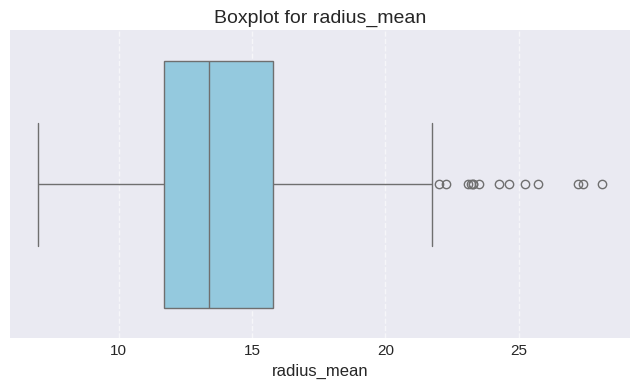

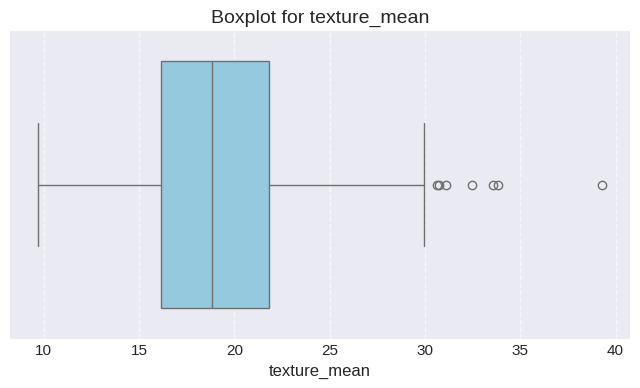

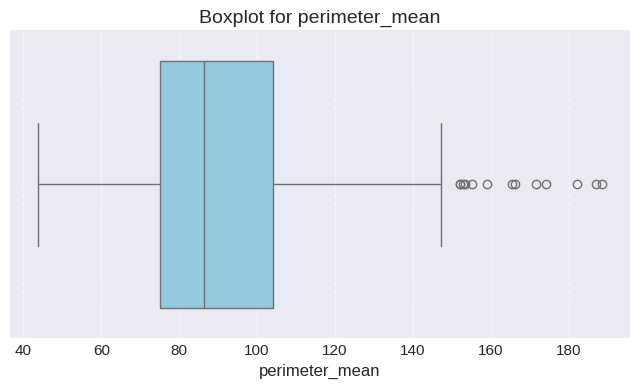

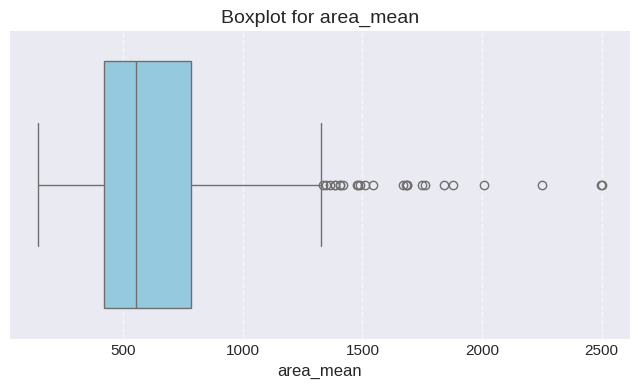

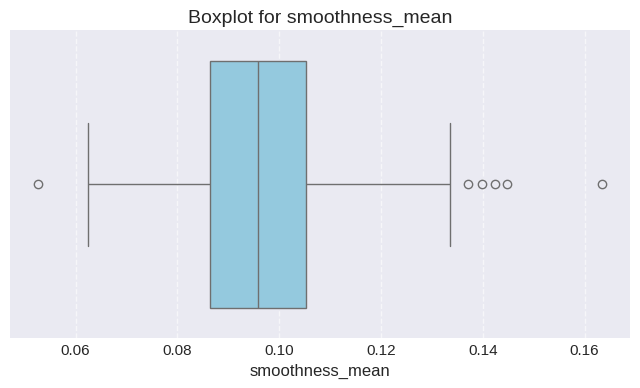

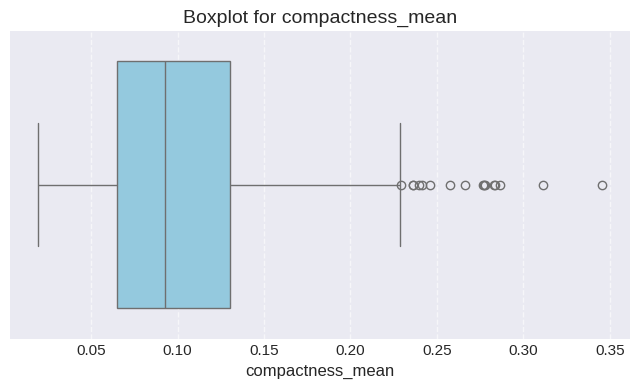

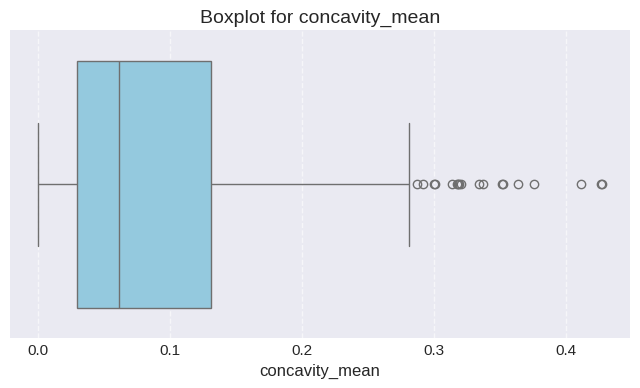

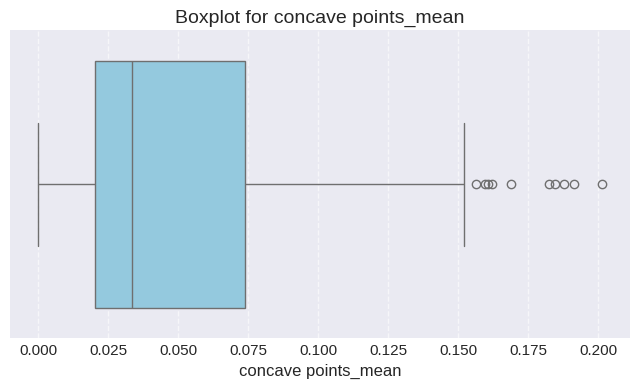

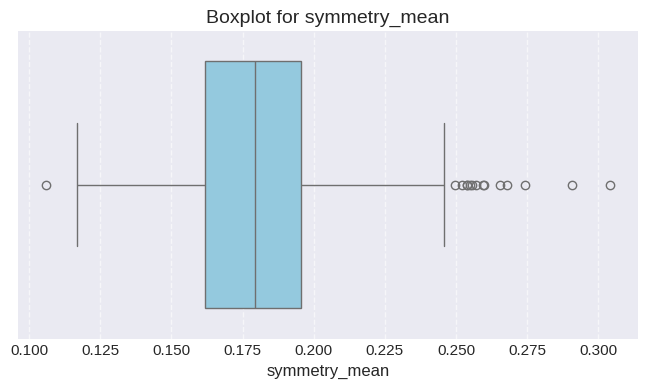

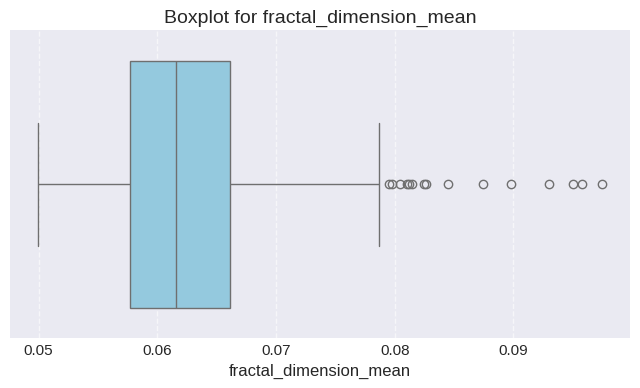

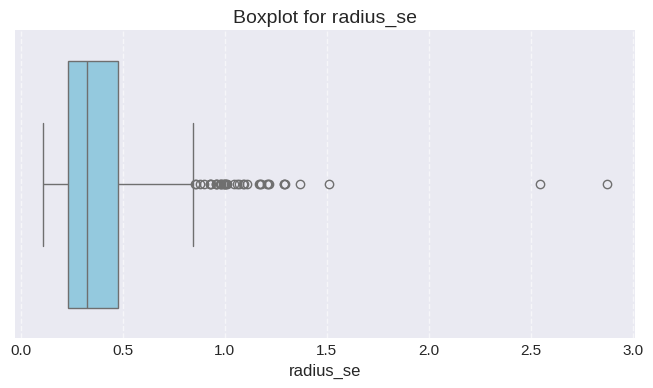

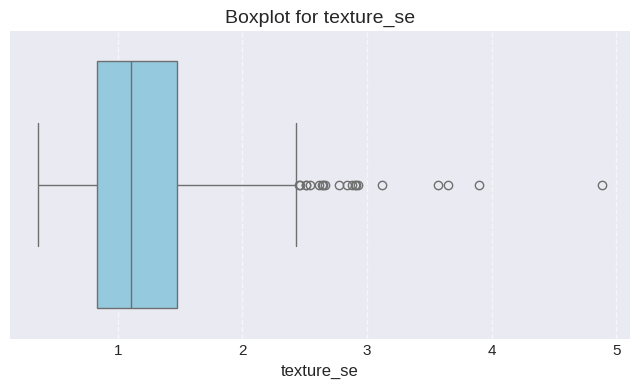

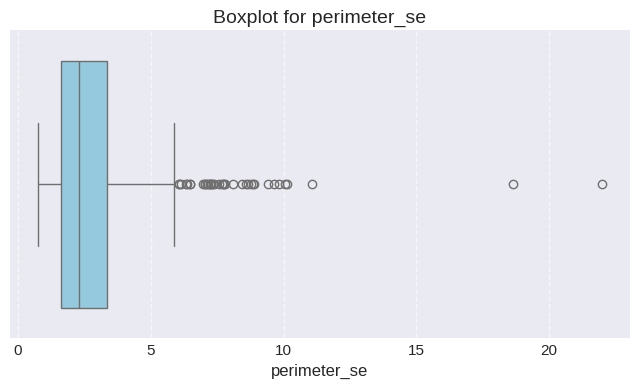

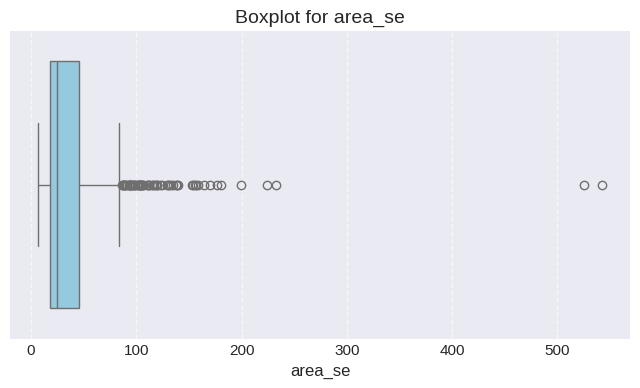

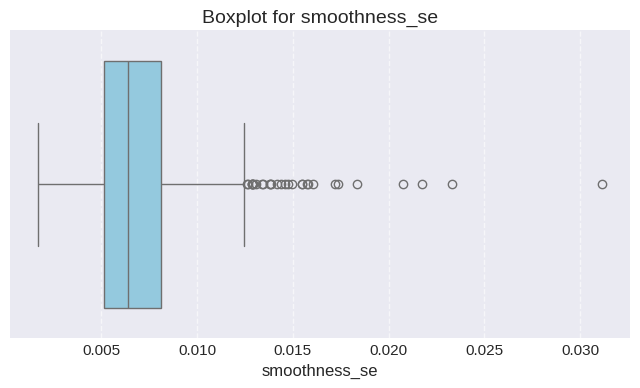

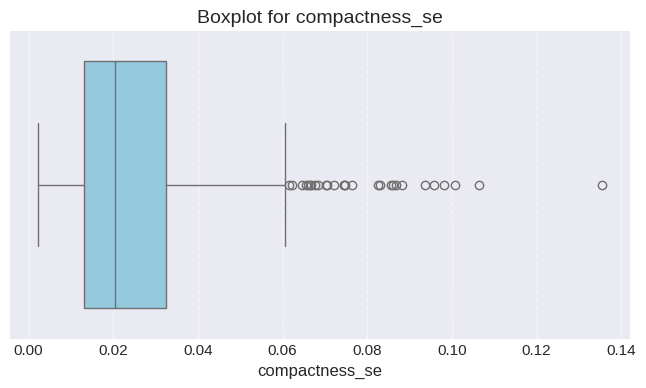

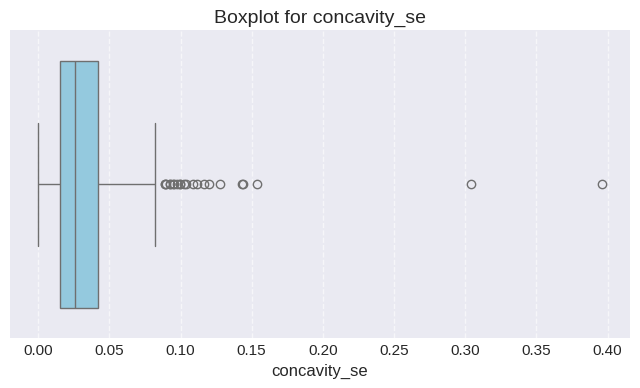

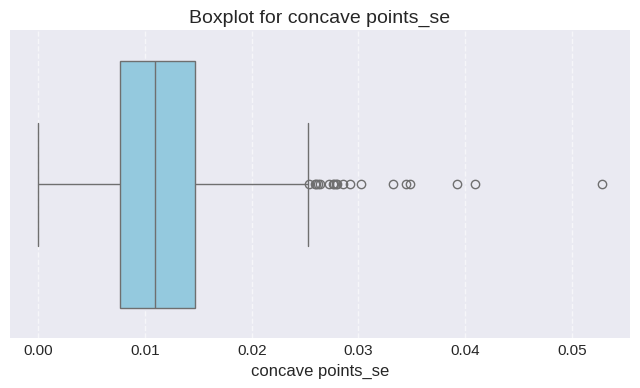

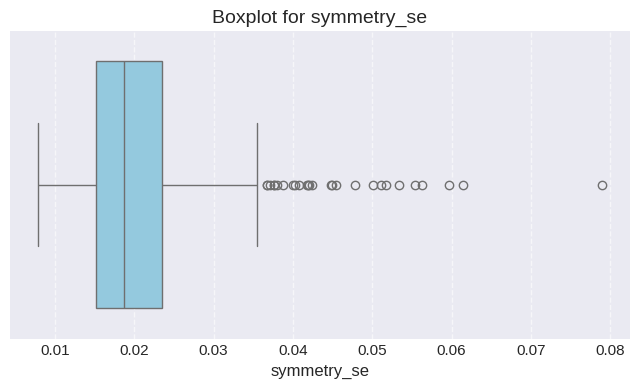

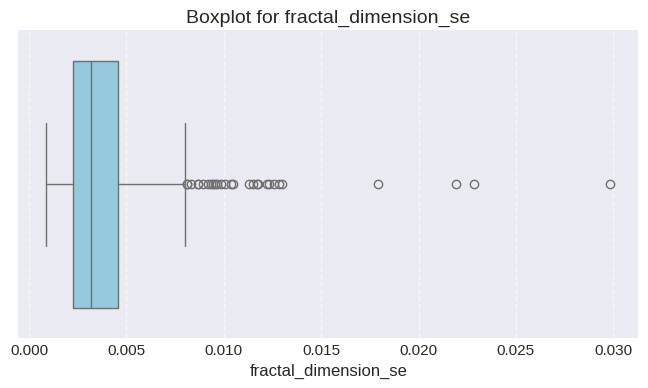

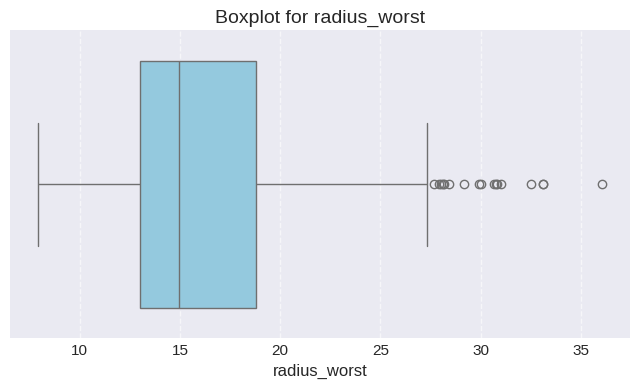

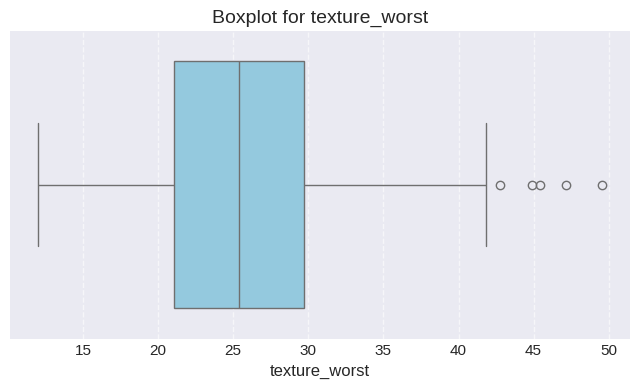

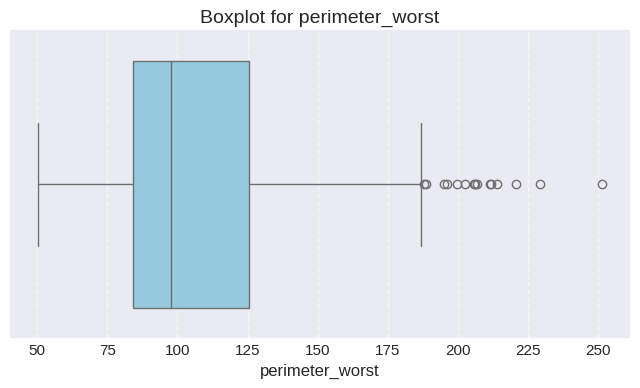

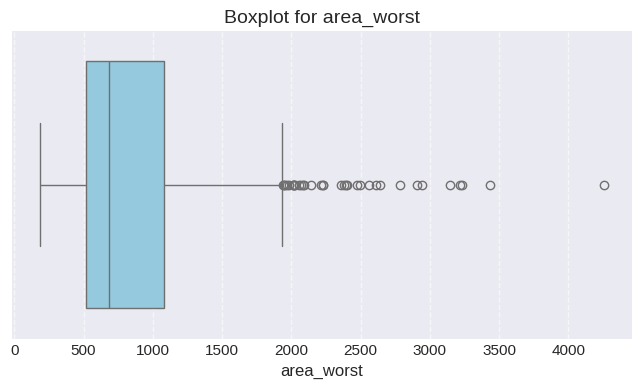

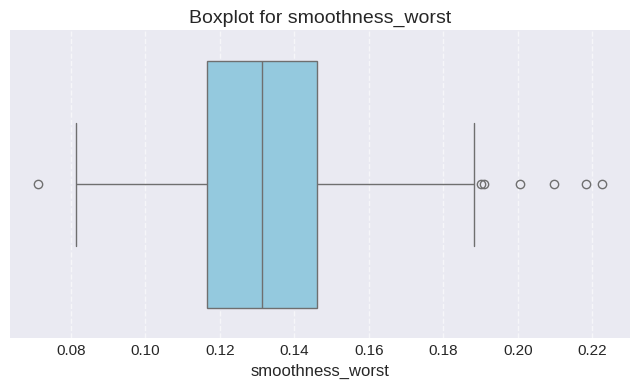

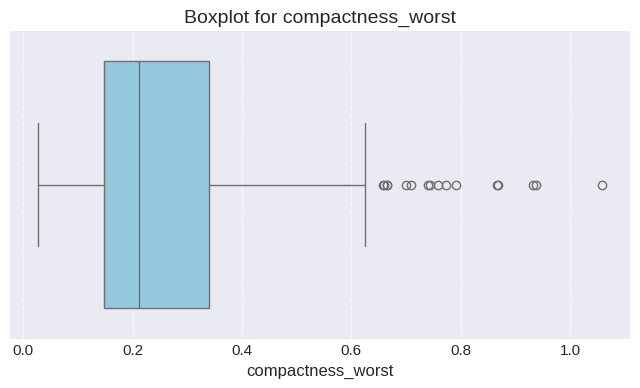

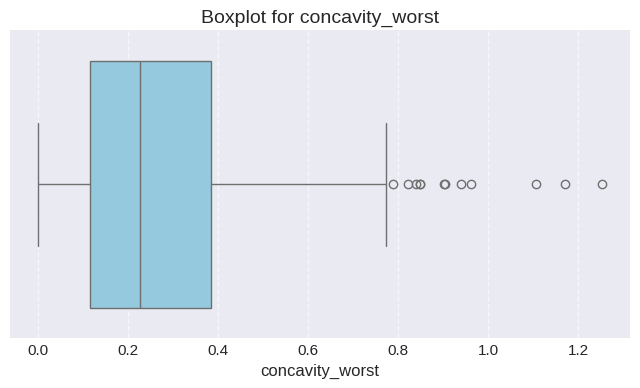

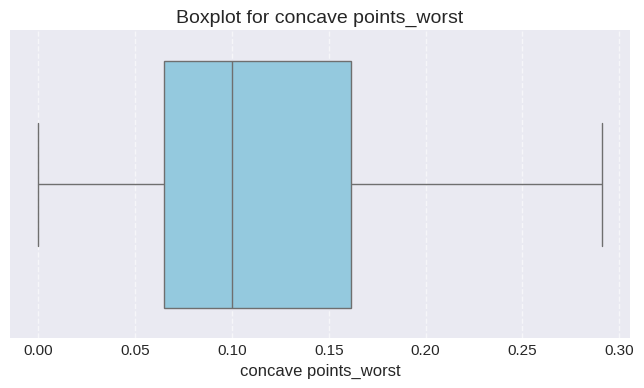

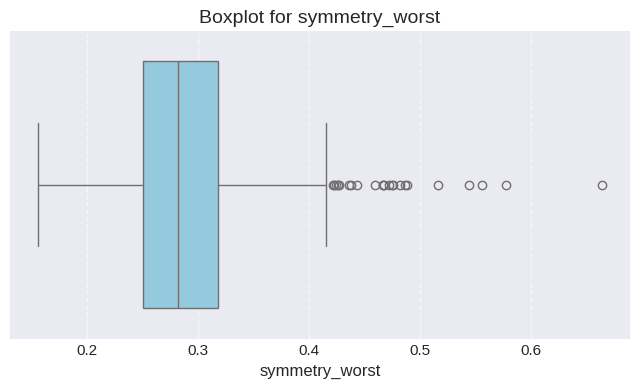

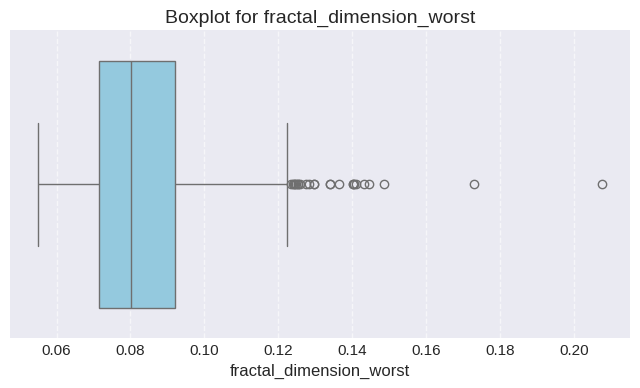

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.style.use('seaborn-v0_8-darkgrid')

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14)
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

None

In [9]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
df = df.drop_duplicates()

cols = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se',
    'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se',
    'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst',
    'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]


for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    before_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    df[col] = df[col].clip(lower, upper)
    after_outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    print(f"🔹 {col}: {before_outliers} outliers were clipped to within bounds")

print("_________________________________________________________تمت المعالجة ______________________________________________________")

🔹 radius_mean: 14 outliers were clipped to within bounds
🔹 texture_mean: 7 outliers were clipped to within bounds
🔹 perimeter_mean: 13 outliers were clipped to within bounds
🔹 area_mean: 25 outliers were clipped to within bounds
🔹 smoothness_mean: 6 outliers were clipped to within bounds
🔹 compactness_mean: 16 outliers were clipped to within bounds
🔹 concavity_mean: 18 outliers were clipped to within bounds
🔹 concave points_mean: 10 outliers were clipped to within bounds
🔹 symmetry_mean: 15 outliers were clipped to within bounds
🔹 fractal_dimension_mean: 15 outliers were clipped to within bounds
🔹 radius_se: 38 outliers were clipped to within bounds
🔹 texture_se: 20 outliers were clipped to within bounds
🔹 perimeter_se: 38 outliers were clipped to within bounds
🔹 area_se: 65 outliers were clipped to within bounds
🔹 smoothness_se: 30 outliers were clipped to within bounds
🔹 compactness_se: 28 outliers were clipped to within bounds
🔹 concavity_se: 22 outliers were clipped to within bound

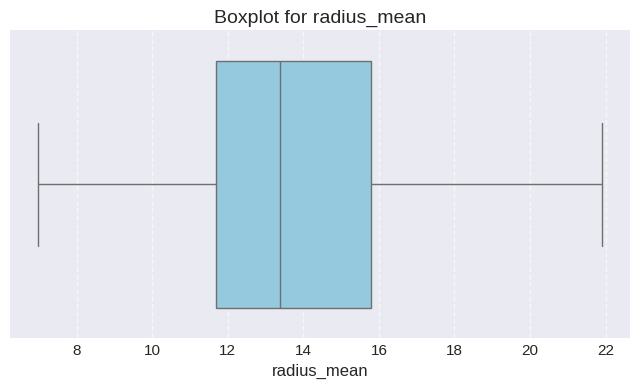

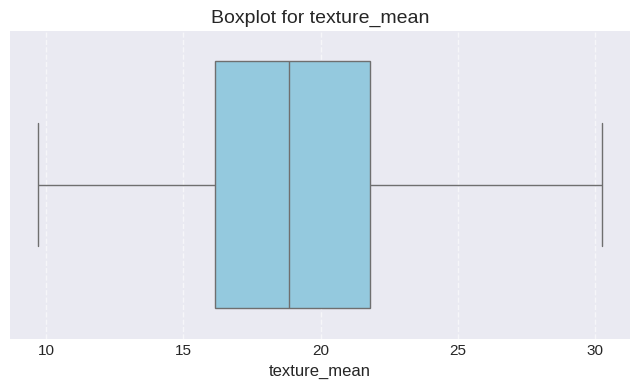

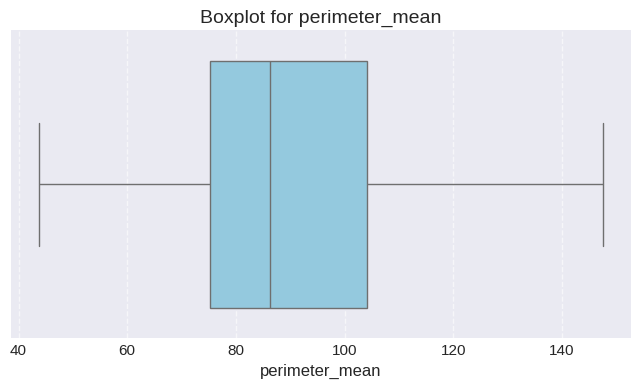

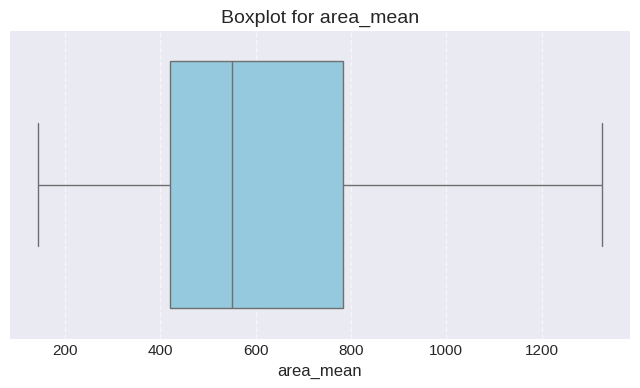

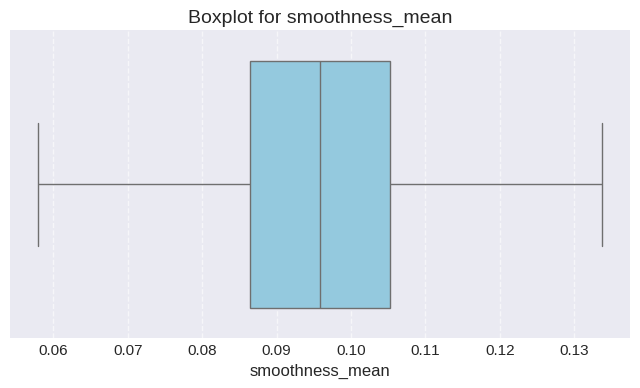

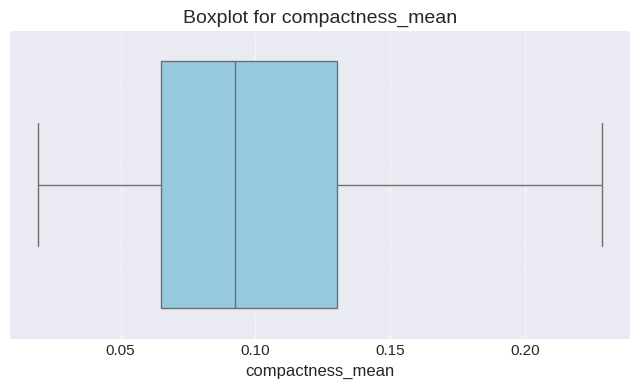

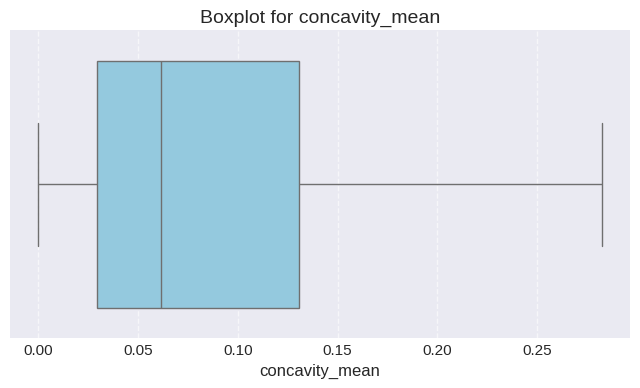

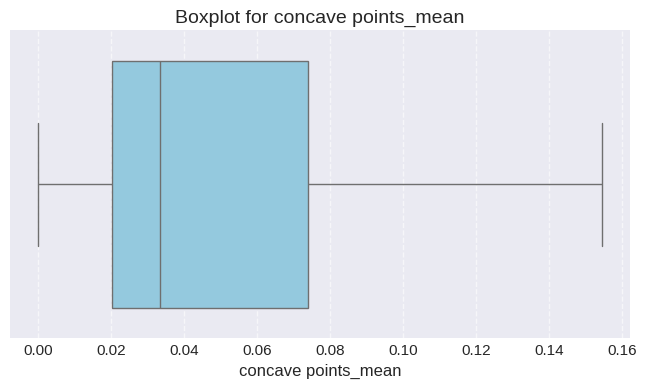

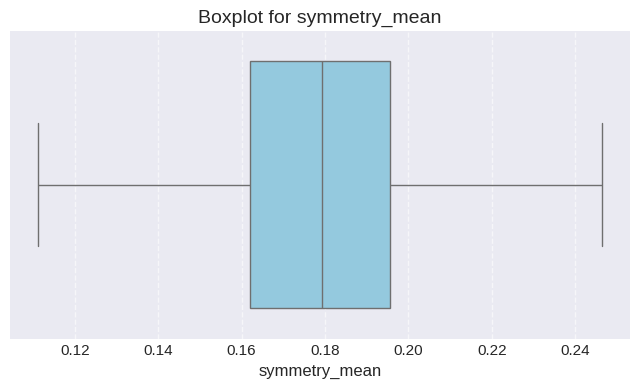

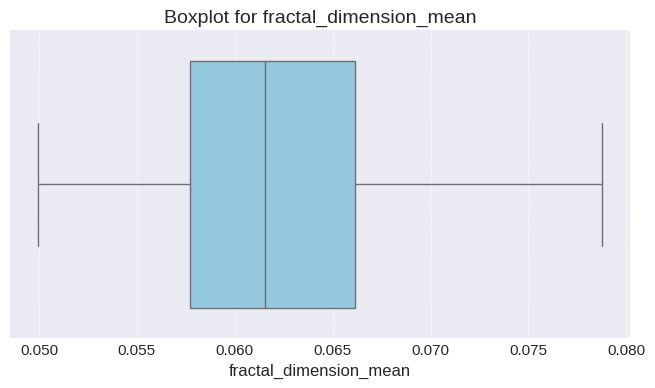

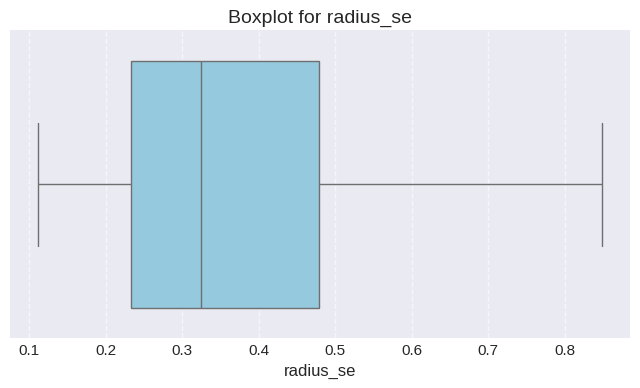

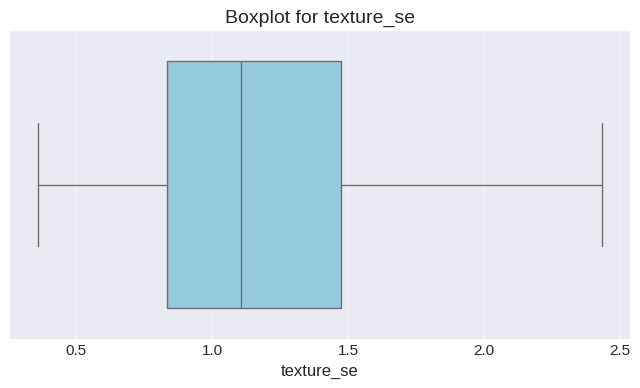

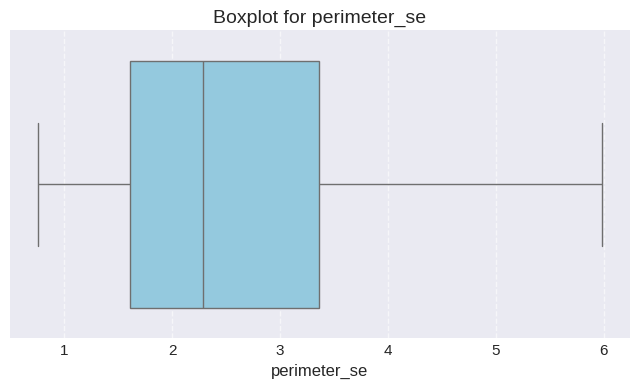

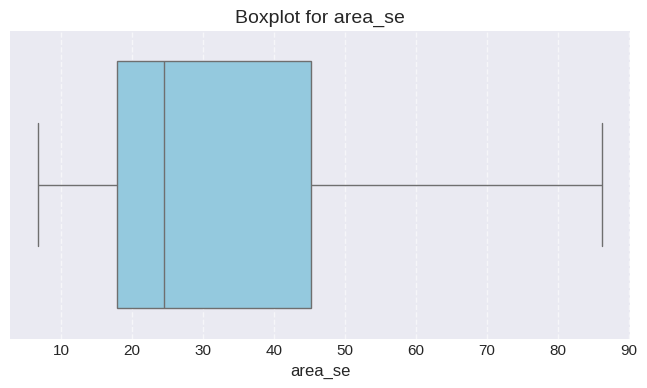

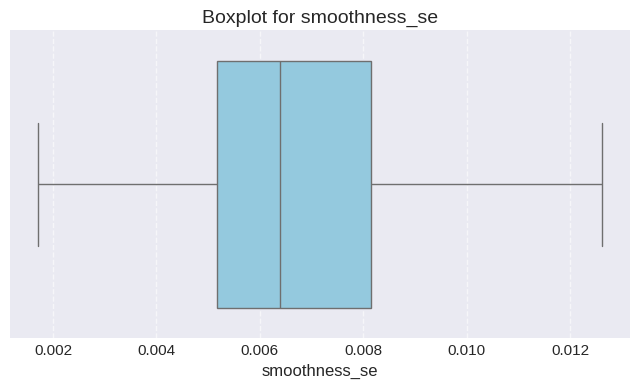

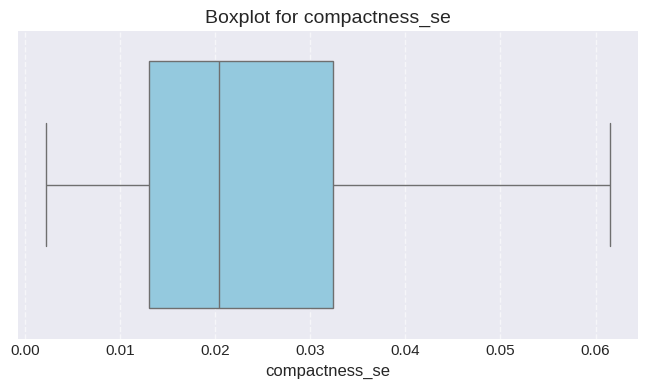

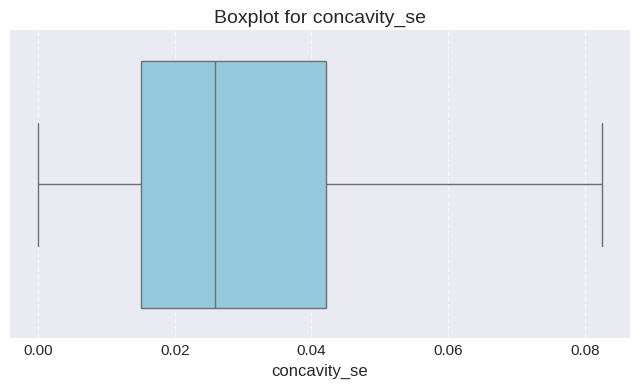

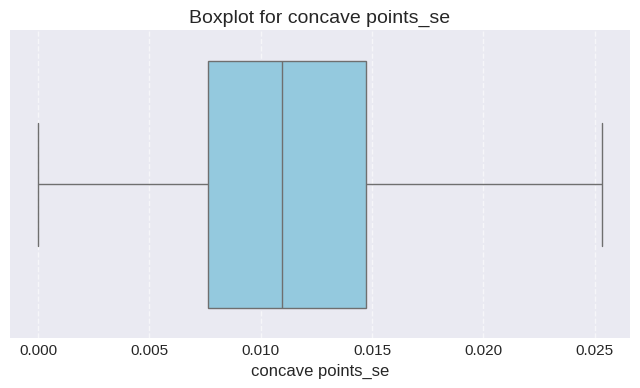

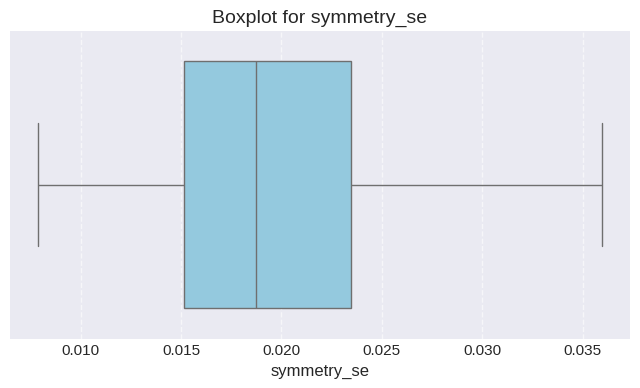

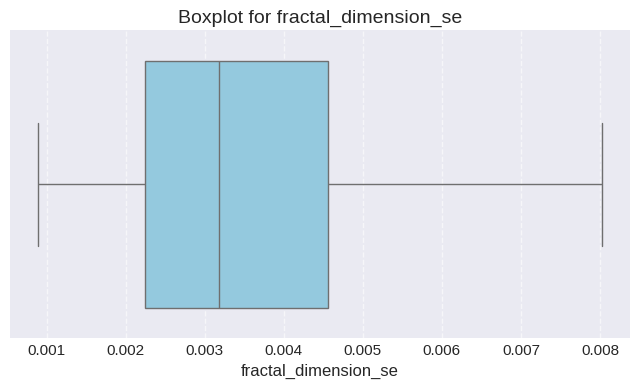

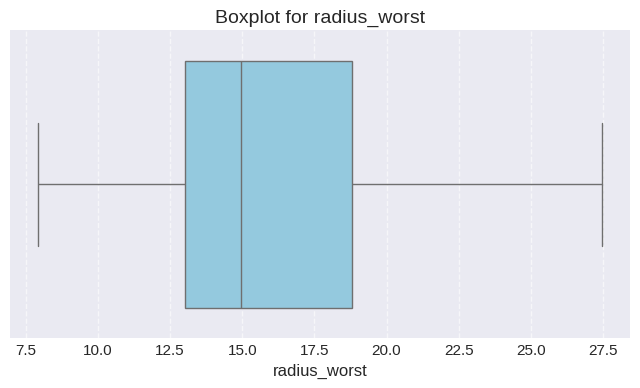

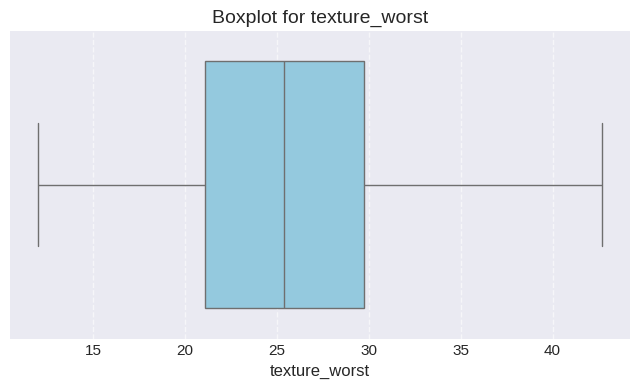

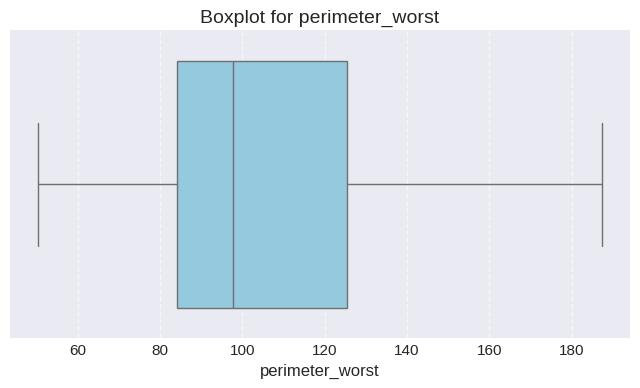

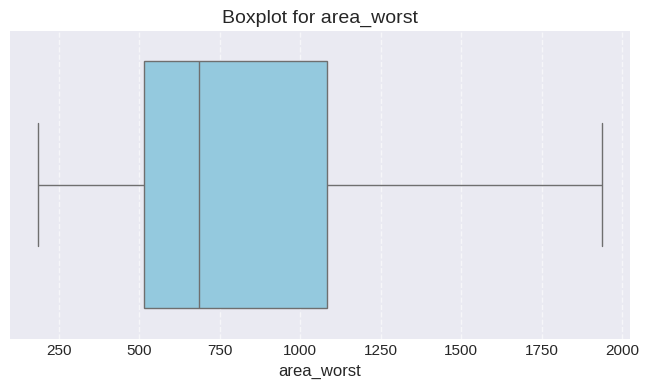

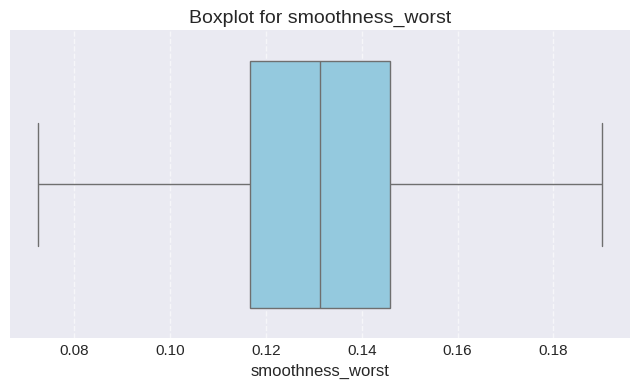

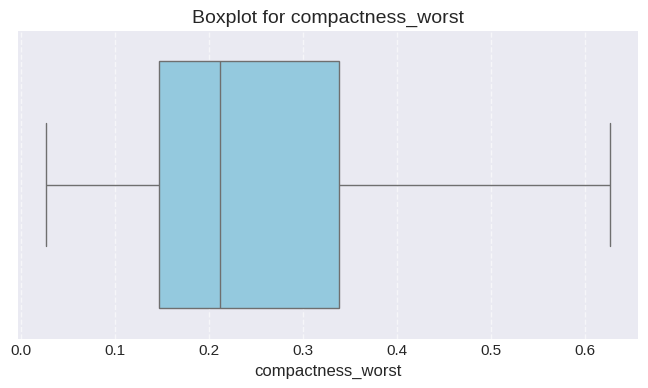

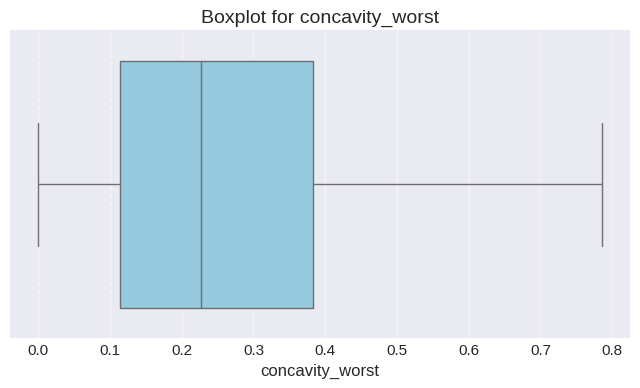

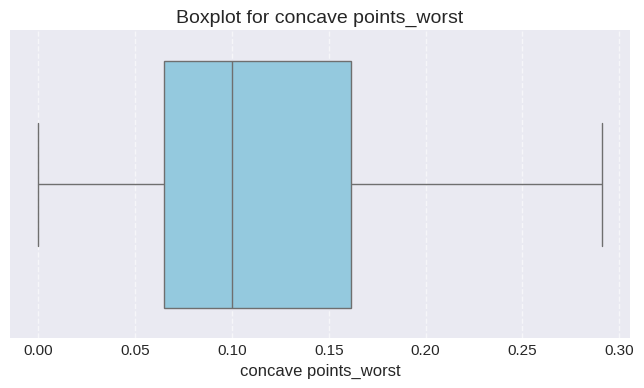

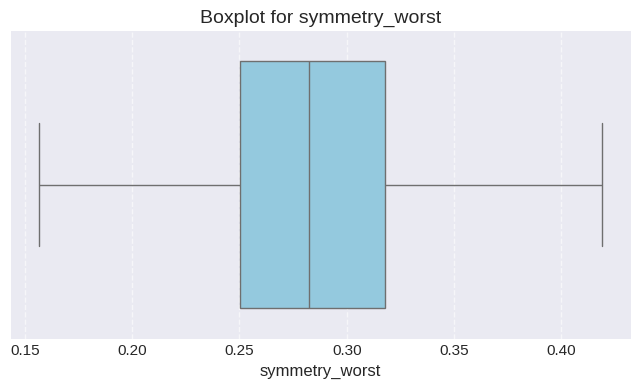

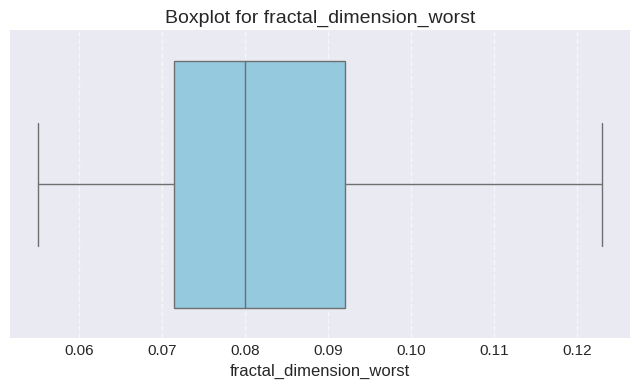

In [11]:
plt.style.use('seaborn-v0_8-darkgrid')

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=14)
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


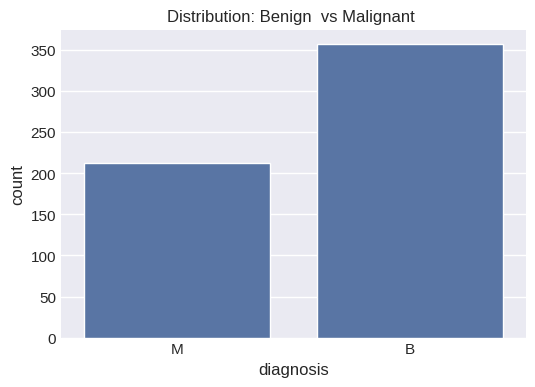

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution: Benign  vs Malignant ')
plt.show()

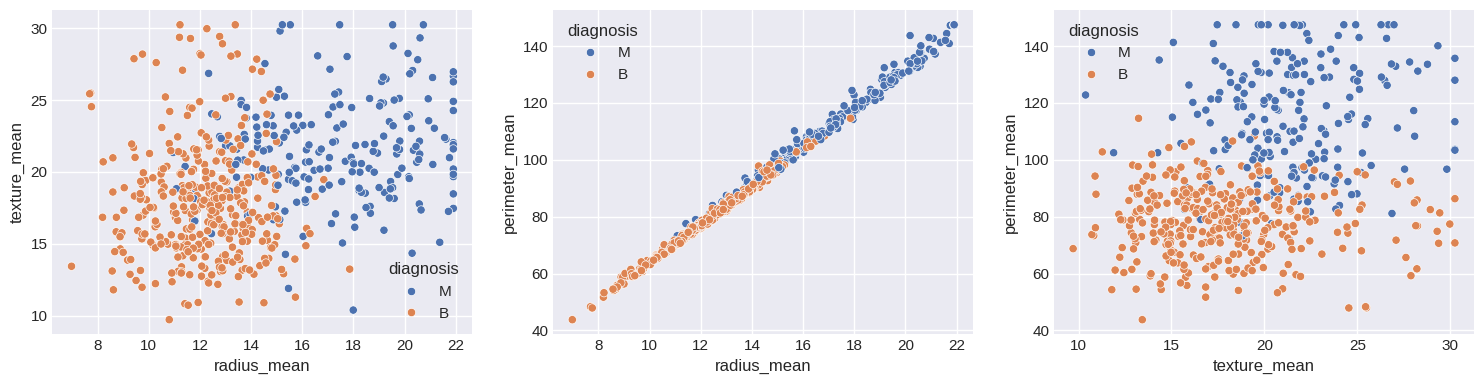

In [13]:
feats = ['radius_mean','texture_mean','perimeter_mean']

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='radius_mean', y='perimeter_mean', hue='diagnosis')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='texture_mean', y='perimeter_mean', hue='diagnosis')

plt.tight_layout()
plt.show()

In [14]:
if 'diagnosis' in df.columns:
        df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})


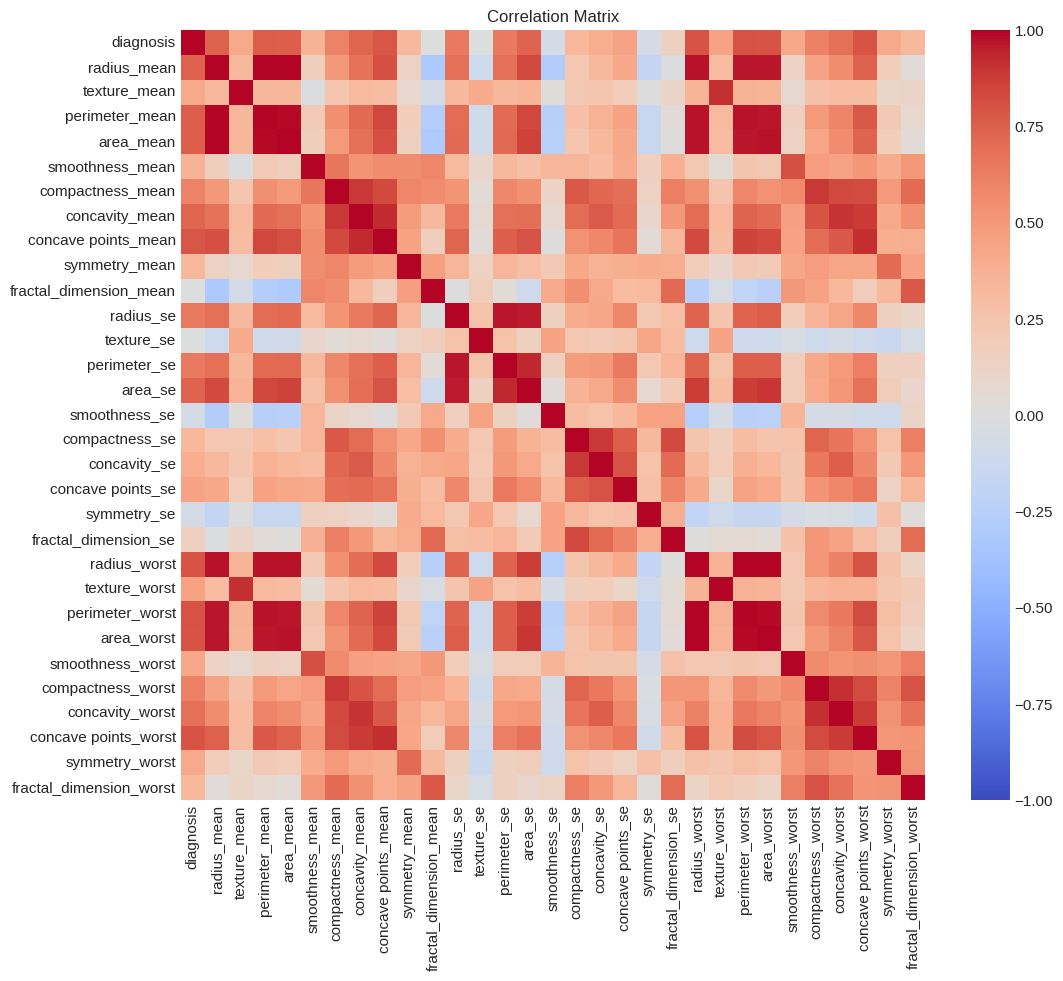

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()

In [16]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train shape: (455, 30) Test shape: (114, 30)


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

models = {
    'LogisticRegression': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000))
    ]),

    'SVC': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', SVC(probability=True))
    ]),

    'RandomForest': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('model', RandomForestClassifier(random_state=42))
    ]),

    'XGBoost': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('model', xgb.XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        ))
    ])
}

results = {}
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    probs = pipeline.predict_proba(X_test)[:, 1]

    results[name] = {
        'accuracy': accuracy_score(y_test, preds),
        'precision': precision_score(y_test, preds),
        'recall': recall_score(y_test, preds),
        'f1': f1_score(y_test, preds),
        'roc_auc': roc_auc_score(y_test, probs)
    }

results_df = pd.DataFrame(results).T.sort_values('roc_auc', ascending=False)
display(results_df)

,accuracy,precision,recall,f1,roc_auc
XGBoost,0.964912,1.00000,0.904762,0.950000,0.996362
LogisticRegression,0.964912,0.97500,0.928571,0.951220,0.996362
SVC,0.973684,0.97561,0.952381,0.963855,0.996032
RandomForest,0.973684,1.00000,0.928571,0.962963,0.993386


In [18]:
best_name = results_df.index[0]
best_model = models[best_name]

os.makedirs('models', exist_ok=True)
joblib.dump(best_model, 'models/breast_cancer_model.pkl')

joblib.dump(scaler, 'models/scaler.pkl')


joblib.dump(list(X.columns), 'models/features.pkl')

print("Saved: model + scaler + features")
print(f"Saved best model ({best_name}) to 'models/'")

Saved: model + scaler + features
Saved best model (XGBoost) to 'models/'


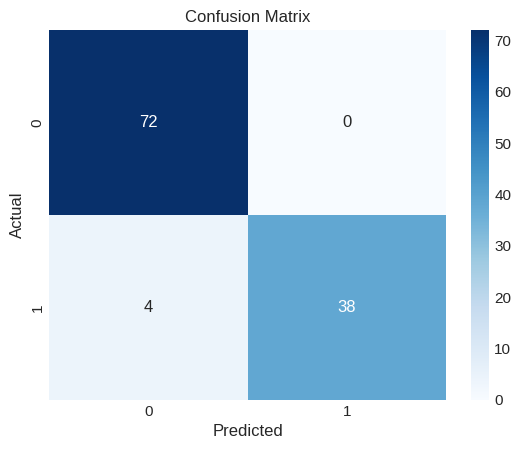

In [19]:
preds = best_model.predict(X_test)
probs = best_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


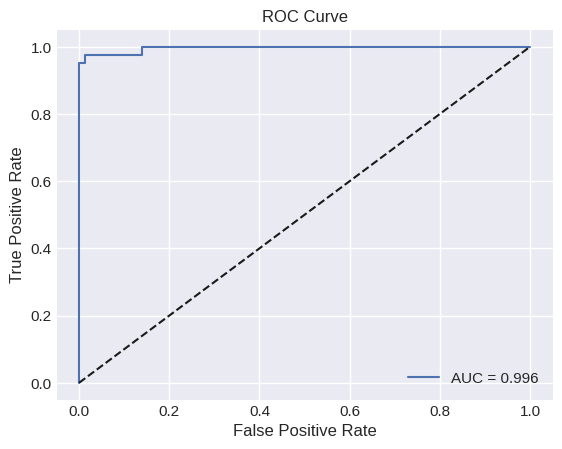

In [20]:
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, probs):.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 14. Tkinter desktop app




In [21]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.2 MB/s eta 0:00:00


In [22]:
from ipywidgets import Text, Button, VBox, HBox, Label, Output, Layout
import numpy as np
import pandas as pd
import joblib


model = joblib.load('models/breast_cancer_model.pkl')
scaler = joblib.load('models/scaler.pkl')
features = joblib.load('models/features.pkl')


input_widgets = []
for f in features:
    lbl = Label(f, layout=Layout(width='200px'))
    txt = Text(placeholder="Enter a number", layout=Layout(width='200px'))
    input_widgets.append(HBox([lbl, txt]))

btn = Button(
    description="Predict",
    button_style='success',
    layout=Layout(width='150px', margin='10px 0px')
)
out = Output(layout=Layout(border='1px solid black', padding='10px'))


def on_button_clicked(b):
    try:
        values = []
        for w in input_widgets:
            v = w.children[1].value.strip()
            if v == "":
                raise ValueError("All fields must be filled!")
            values.append(float(v.replace(',', '.')))


        arr = np.array(values).reshape(1, -1)


        arr_scaled = scaler.transform(arr)


        pred = model.predict(arr_scaled)[0]
        prob = model.predict_proba(arr_scaled)[0][1]

        result = "Malignant (Cancer)" if pred == 1 else "Benign (Normal)"
        with out:
            out.clear_output()
            print(f"Prediction: {result}")
            print(f"Probability: {prob:.3f}")

    except Exception as e:
        with out:
            out.clear_output()
            print("Error:", e)

btn.on_click(on_button_clicked)

display(VBox([*input_widgets, btn, out]))


## 14. Flask


In [23]:
!pip install pyngrok flask -q

In [24]:
!ngrok authtoken "36LXRbgDl1kdWq3BzahzFIc1YdC_7AsYUgWnkkpkuTQJYGtnQ"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [28]:
pip install flask-cors


In [29]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import joblib, pandas as pd, os
from flask_cors import CORS


app = Flask(__name__)
CORS(app)

MODEL_DIR = "/content/models"

best_model = joblib.load(os.path.join(MODEL_DIR, "breast_cancer_model.pkl"))
scaler = joblib.load(os.path.join(MODEL_DIR, "scaler.pkl"))
features = joblib.load(os.path.join(MODEL_DIR, "features.pkl"))

ngrok.set_auth_token("36LXRbgDl1kdWq3BzahzFIc1YdC_7AsYUgWnkkpkuTQJYGtnQ")

public_url = ngrok.connect(5000)
print(" * ngrok tunnel:", public_url)


@app.route("/")
def home():
    return "Breast Cancer Prediction API is running via ngrok!"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        json_data = request.get_json()

        if isinstance(json_data, dict):
            df = pd.DataFrame([json_data])
        elif isinstance(json_data, list):
            df = pd.DataFrame(json_data)
        else:
            return jsonify({"error": "Invalid JSON format"}), 400

        missing_cols = set(features) - set(df.columns)
        if missing_cols:
            return jsonify({"error": f"Missing columns: {list(missing_cols)}"}), 400

        df = df[features]

        df_scaled = pd.DataFrame(scaler.transform(df), columns=features)

        preds = best_model.predict(df_scaled)
        probs = best_model.predict_proba(df_scaled)[:, 1]

        results = []
        for p, prob in zip(preds, probs):
            label = "Malignant" if p == 1 else "Benign"
            results.append({"prediction": label, "probability": float(prob)})

        return jsonify(results)

    except Exception as e:
        return jsonify({"error": str(e)}), 500

app.run(port=5000)


 * ngrok tunnel: NgrokTunnel: "https://unoccurring-lennox-augustly.ngrok-free.dev" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:32:30] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:36:19] "OPTIONS /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:36:20] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:45:07] "OPTIONS /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:45:07] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:45:38] "OPTIONS /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:45:38] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:45:46] "OPTIONS /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:45:47] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2025 16:45